# Machine Learning Project 
# group 4

### Eduardo Murillo
### Arpit Gupta

# Regression 

In [1]:
#importing Libraries to read the data

import pandas as pd
import numpy as np

In [2]:
#Reading the Data

auto = pd.read_csv("C:\\Users\\arpit\\Desktop\\Used cars dataset\\autos.csv", encoding="latin-1")

In [3]:
auto.loc[:,'dateCrawled']

0         2016-03-24 11:52:17
1         2016-03-24 10:58:45
2         2016-03-14 12:52:21
3         2016-03-17 16:54:04
4         2016-03-31 17:25:20
                 ...         
371523    2016-03-14 17:48:27
371524    2016-03-05 19:56:21
371525    2016-03-19 18:57:12
371526    2016-03-20 19:41:08
371527    2016-03-07 19:39:19
Name: dateCrawled, Length: 371528, dtype: object

## Information About the data

In [4]:
#Information about the Data


#dateCrawled : when this ad was first crawled, all field-values are taken from this date
#name : "name" of the car
#seller : private or dealer
#offerType
#price : the price on the ad to sell the car
#abtest
#vehicleType
#yearOfRegistration : at which year the car was first registered
#gearbox : whether automatic or manual
#powerPS : power of the car in PS
#model : car model 
#kilometer : how many kilometers the car has driven
#monthOfRegistration : at which month the car was first registered
#fuelType : type of fuel car uses
#brand : car brand
#notRepairedDamage : if the car has a damage which is not repaired yet
#dateCreated : the date for which the ad at ebay was created
#postalCode 
#lastSeenOnline : when the crawler saw this ad last online


# Exploring Data

## Categorical Variable

In [5]:
 #The following data has 371528 rows and 20 columns
    
auto.shape

(371528, 20)

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


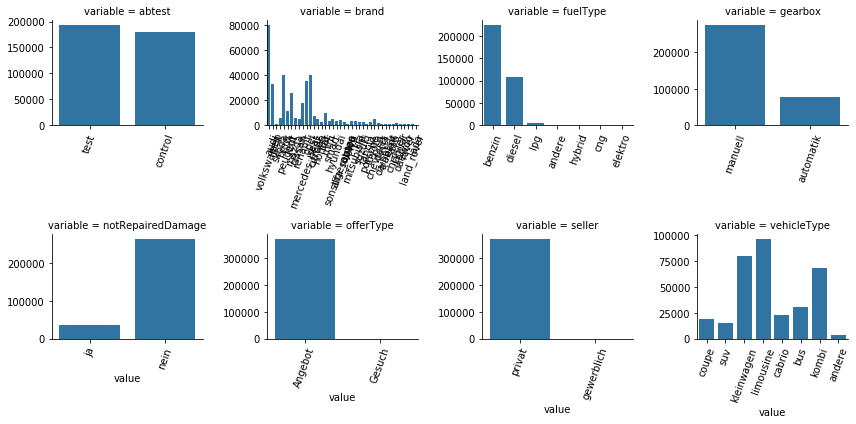

In [6]:
#checking the distribution of categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

f=pd.melt(auto,value_vars=sorted(auto[['abtest','seller','offerType','vehicleType','gearbox','fuelType','brand','notRepairedDamage']]))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=70) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [7]:
# Removing the outliers in the the categorical variables

#We can remove the seller column as there is only 3 cars sold by gewerblich while the rest of th cars are sold by privat
auto['seller'].value_counts()
auto = auto[auto['seller'] != 'gewerblich']
auto = auto.drop('seller', axis=1)

In [8]:
# Same is the case with the column offerType, we can remove this column as there are only 12 cars with the offertype gesuch
auto['offerType'].value_counts()
auto = auto[auto['offerType'] != 'gesuch']
auto = auto.drop('offerType', axis=1)


In [9]:
# checking the distribution of abtest column
auto['abtest'].value_counts()

test       192584
control    178941
Name: abtest, dtype: int64

In [10]:
# checking the distribution of vehicleType column
auto['vehicleType'].value_counts()

limousine     95893
kleinwagen    80022
kombi         67563
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [11]:
# checking the distribution of fuelType column
auto['fuelType'].value_counts()
auto = auto[auto['fuelType'] != 'andere']
auto = auto[auto['fuelType'] != 'hybrid']
auto = auto[auto['fuelType'] != 'elektro']


In [12]:
auto.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [13]:
auto['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'cng'], dtype=object)

In [14]:
# checking the distribution of brand column
auto['brand'].value_counts()

volkswagen        79600
bmw               40253
opel              40113
mercedes_benz     35286
audi              32860
ford              25562
renault           17930
peugeot           11018
fiat               9665
seat               7020
mazda              5694
skoda              5641
smart              5239
citroen            5177
nissan             5032
toyota             4557
sonstige_autos     3869
hyundai            3643
mini               3389
volvo              3323
mitsubishi         3052
honda              2782
kia                2553
alfa_romeo         2345
suzuki             2327
porsche            2213
chevrolet          1842
chrysler           1452
dacia               900
jeep                807
daihatsu            804
subaru              778
land_rover          770
jaguar              621
trabant             550
daewoo              541
saab                529
rover               490
lancia              483
lada                225
Name: brand, dtype: int64

In [15]:
# checking the distribution of model column
auto['model'].value_counts()

golf               30055
andere             26243
3er                20563
polo               13090
corsa              12567
                   ...  
i3                     8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [16]:
# checking the distribution of brand column
auto['brand'].value_counts()

volkswagen        79600
bmw               40253
opel              40113
mercedes_benz     35286
audi              32860
ford              25562
renault           17930
peugeot           11018
fiat               9665
seat               7020
mazda              5694
skoda              5641
smart              5239
citroen            5177
nissan             5032
toyota             4557
sonstige_autos     3869
hyundai            3643
mini               3389
volvo              3323
mitsubishi         3052
honda              2782
kia                2553
alfa_romeo         2345
suzuki             2327
porsche            2213
chevrolet          1842
chrysler           1452
dacia               900
jeep                807
daihatsu            804
subaru              778
land_rover          770
jaguar              621
trabant             550
daewoo              541
saab                529
rover               490
lancia              483
lada                225
Name: brand, dtype: int64

## Continous Variables

In [17]:
#Since nrOfPictures have only one value i.e 0, It is of no use in regression and we can drop it
auto['nrOfPictures'].value_counts()
auto = auto.drop('nrOfPictures', axis=1)

In [18]:
auto['price'].describe()

count    3.709350e+05
mean     1.151552e+04
std      6.793571e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [19]:
# The price column contains outliers the price is ranged from 0 to 2.14*10^9
auto = auto[(auto['price']<200000) & (auto['price'] > 100)]

In [20]:
auto['powerPS'].describe()

count    356476.000000
mean        117.122042
std         190.218067
min           0.000000
25%          75.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [21]:
# powerPS is ranged between 0 to 20000 PS, A car can't have 0 PS and usually have lesser than 1500 PS(Bugatti Cheron)
#So removing the outliers
auto = auto[(auto.powerPS < 1500) & (auto.powerPS > 10)]

In [22]:
#Year of registration
auto['yearOfRegistration'].describe()

count    320979.000000
mean       2003.839257
std          32.883113
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [23]:
# Since the car was invented in 1885, we will set the range from 1885 to 2020
auto = auto[(auto['yearOfRegistration'] > 1884) & (auto['yearOfRegistration'] < 2020) ]

In [24]:
auto.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [25]:
auto = auto[(auto['kilometer'] > 4999) & (auto['kilometer'] <= 150000)]
auto.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,320948.000000,320948.000000,320948.000000,320948.000000,320948.000000,320948.000000
mean,6222.561443,2003.624780,126.650632,125614.959433,5.985914,51487.757917
std,8400.725367,7.190689,65.075926,39168.669820,3.583698,25763.803483
min,101.000000,1910.000000,11.000000,5000.000000,0.000000,1067.000000
25%,1449.000000,1999.000000,80.000000,100000.000000,3.000000,31141.000000
50%,3499.000000,2004.000000,116.000000,150000.000000,6.000000,50678.000000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000,72336.000000
max,199900.000000,2019.000000,1436.000000,150000.000000,12.000000,99998.000000


In [26]:
auto.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [27]:
#Removing the not necessary columns which are not useful in predicting price
auto = auto.drop(['dateCrawled', 'name', 'monthOfRegistration', 'dateCreated', 'postalCode','lastSeen'], axis=1)

In [28]:
auto.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja


# Imputing the null values

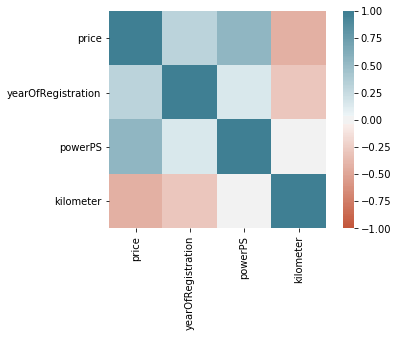

In [29]:
corr = auto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [30]:
auto.isna().sum()

price                     0
abtest                    0
vehicleType           21117
yearOfRegistration        0
gearbox                6011
powerPS                   0
model                 12667
kilometer                 0
fuelType              19612
brand                     0
notRepairedDamage     46996
dtype: int64

In [31]:
# Since the vehicleType has 8 categories, we will create a new category of "Not Specified" for the null values
auto['vehicleType'].fillna(value='not-specified', inplace=True)

In [32]:
# we can impute the gear box null values with the mode
auto['gearbox'].fillna(value=auto['gearbox'].mode()[0], inplace=True)

In [33]:
#Since there are 250 unique values of model, we will impute the null values with "not Specified"
auto['model'].fillna(value='not-specified', inplace = True)

In [34]:
# imputing the mode in fuelType column
auto['fuelType'].fillna(value= auto['fuelType'].mode()[0], inplace=True)

In [35]:
# imputing th mode in notRepairedDamage
auto['notRepairedDamage'].fillna(value=auto['notRepairedDamage'].mode()[0], inplace=True)

In [36]:
auto.isna().sum()

price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [37]:
auto.head(3)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,not-specified,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,nein
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein


# Splitting Data for training and test

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
auto['vehicleType'] = label_encoder.fit_transform(auto['vehicleType'])
auto['abtest'] = label_encoder.fit_transform(auto['abtest'])
auto['notRepairedDamage'] = label_encoder.fit_transform(auto['notRepairedDamage'])
auto['gearbox'] = label_encoder.fit_transform(auto['gearbox'])
auto['model'] = label_encoder.fit_transform(auto['model'])
auto['fuelType'] = label_encoder.fit_transform(auto['fuelType'])
auto['brand'] = label_encoder.fit_transform(auto['brand'])




In [39]:
#creating dummy variables for the categorical columns
dvehicletype = pd.get_dummies(auto['vehicleType'], columns = 'vehicleType', prefix = 'vehicleType')
dvehicletype
dABtest = pd.get_dummies(auto['abtest'], columns = 'abtest', prefix = 'abtest')
dgearbox = pd.get_dummies(auto['gearbox'], columns = 'gearbox', prefix = 'gearbox')
dfueltype = pd.get_dummies(auto['fuelType'], columns = 'fuelType', prefix = 'fuelType')



In [40]:
auto = pd.concat([auto, dvehicletype, dABtest, dgearbox, dfueltype], axis=1)

In [41]:
auto.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,...,vehicleType_7,vehicleType_8,abtest_0,abtest_1,gearbox_0,gearbox_1,fuelType_0,fuelType_1,fuelType_2,fuelType_3
1,18300,1,3,2011,1,190,163,125000,2,1,...,0,0,0,1,0,1,0,0,1,0
2,9800,1,8,2004,0,163,119,125000,2,14,...,0,1,0,1,1,0,0,0,1,0
3,1500,1,4,2001,1,75,118,150000,0,38,...,0,0,0,1,0,1,1,0,0,0
4,3600,1,4,2008,1,69,103,90000,2,31,...,0,0,0,1,0,1,0,0,1,0
5,650,1,6,1995,1,102,11,150000,0,2,...,0,0,0,1,0,1,1,0,0,0


In [42]:
# splitting data into dependent and independent variable
Y = auto[['price']]
X = auto.loc[:,auto.columns != 'price']

#converting Y into log 
#Y = np.log1p(Y)

In [43]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [44]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



###### We have used the minmax scaler because it is non distorting. It doesn't affect the higher values in the dataset. we have also removed the outliers and we dont have negative values in our dataset

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5641.599861017855

In [47]:
print('Train score: {:.4f}'.format(regressor.score(X_train,y_train)))
print('Test score: {:.4f}'.format(regressor.score(X_test,y_test)))


Train score: 0.5336
Test score: 0.5390


# LinearSVR

In [47]:
from sklearn.svm import LinearSVR
regSVR = LinearSVR()
regSVR.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [48]:
print('Train score SVR: {:.4f}'.format(regSVR.score(X_train,y_train)))
print('Test score SVR: {:.4f}'.format(regSVR.score(X_test,y_test)))

Train score SVR: 0.2881
Test score SVR: 0.2958


# SGD Regression

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 50, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print('Train score: {:.4f}' .format(sgd_reg.score(X_train, y_train)))
print('Test score: {:.4f}' .format(sgd_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: -129673244.7389
Test score: -134827724.9413


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# KNN Regressor 

Text(0, 0.5, 'Accuracy')

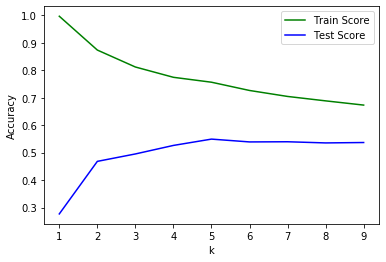

In [49]:
#running the regression on sample of 10000 rows
s_auto = auto.sample(n=10000, random_state = 0)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_trains, y_trains)
    train_score_array.append(knn_reg.score(X_trains, y_trains))
    test_score_array.append(knn_reg.score(X_tests, y_tests))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')

In [50]:
#with K=5 the test score is the best
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}' .format(knn_reg.score(X_trains, y_trains)))
print('Test score: {:.4f}' .format(knn_reg.score(X_tests, y_tests)))

Train score: 0.7563
Test score: 0.5493


In [51]:
from sklearn.metrics import mean_squared_error
y_pred = knn_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

15457.148344372594

# Ridge Regression

In [52]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

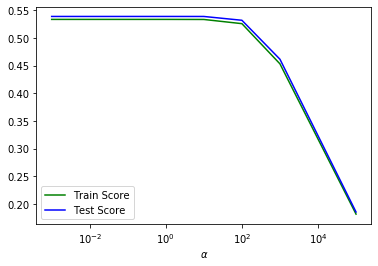

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [54]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.5336
Test score: 0.5389


In [55]:
from sklearn.metrics import mean_squared_error
y_pred = ridge.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5641.644721260119

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ridge, X = X_train, y= y_train, cv=10, n_jobs = -1)

In [57]:
accuracies

array([0.54562323, 0.52593951, 0.53090733, 0.54478516, 0.52513843,
       0.53328342, 0.53270487, 0.52418414, 0.5442949 , 0.52758152])

In [58]:
accuracies.mean()

0.5334442493520946

# Lasso Regression

In [59]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765144572965.4834, tolerance: 1711092631.077772
  positive)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 655082939071.2012, tolerance: 1711092631.077772
  positive)


Text(0.5, 0, '$\\alpha$')

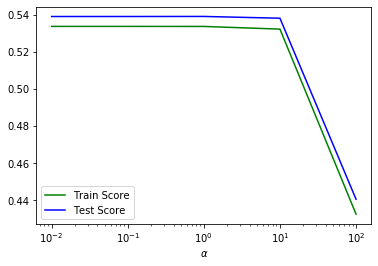

In [60]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [61]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.5336
Test score: 0.5389


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765144572965.4834, tolerance: 1711092631.077772
  positive)


In [62]:
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5641.640527510929

# SVM regression

In [63]:
#running the regression on sample of 1000 rows
s_auto = auto.sample(n=1000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_tests = scaler.transform(X_tests)

In [64]:
#linear
from sklearn import svm
svm_reg = svm.SVR(kernel ='linear')
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.0615
Test score: 0.0351


In [65]:
from sklearn.metrics import mean_squared_error
y_pred = svm_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7162.408299459982

In [66]:
#rbf kernel 
from sklearn import svm
svm_reg = svm.SVR(kernel = 'rbf')
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: -0.1256
Test score: -0.1697


In [67]:
from sklearn.metrics import mean_squared_error
y_pred = svm_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7885.965832801226

In [68]:
#poly
from sklearn import svm
svm_reg = svm.SVR(kernel = 'poly', degree=3, gamma = 1)
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.8736
Test score: 0.2651


In [69]:
from sklearn.metrics import mean_squared_error
y_pred = svm_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6250.85342464499

# Random forest regressor


In [70]:
#running the regression on sample of 1000 rows
s_auto = auto.sample(n=1000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_trains, y_trains)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [71]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_trains, y_trains)

C:\Users\arpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
forest.score(X_trains, y_trains)

0.8201968716174354

In [73]:
forest.score(X_tests, y_tests)

0.3995726114592677

# Polynomial Regression


In [74]:
from  sklearn.preprocessing import PolynomialFeatures

In [75]:
from sklearn.linear_model import LinearRegression
train_score_list = []
test_score_list = []
lreg = LinearRegression()

for n in range(0,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trains)
    X_test_poly = poly.transform(X_tests)
    lreg.fit(X_train_poly, y_trains)
    train_score_list.append(lreg.score(X_train_poly, y_trains))
    test_score_list.append(lreg.score(X_test_poly, y_tests))

In [76]:
print(train_score_list)
print(test_score_list)

[0.0, 0.5313187089116624, 0.1509236653389403]
[-0.00857854385366319, 0.41591893622352616, -32.174274685526846]


In [77]:
# polynomial regression is not suitable for this dataset as it returns the negative train and test score for higher degrees that 1.

# Decision Tree Regressor

In [78]:
#running the regression on sample of 10000 rows
s_auto = auto.sample(n=10000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_trains, y_trains)
tree_pred = tree_reg.predict(X_tests)
print("Decision Tree")
print(mean_absolute_error(y_tests, tree_pred))
print(tree_reg.score(X_tests, y_tests))

Decision Tree
2190.06336
0.5526248126268605


In [79]:
print(tree_reg.score(X_trains, y_trains))

0.9979852063286435


In [80]:
from sklearn.metrics import mean_squared_error
y_pred = tree_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5304.546340540809

The RMSE, Train score and Test score of the models are :

Linear Regression : 
Train score: 0.5336
Test score: 0.5390
RMSE : 5641 

LinearSVR:
Train score SVR: 0.2881
Test score SVR: 0.2958 

SGD Regression :
Train score: -129673244.7389
Test score: -134827724.9413

This is not suitable for this dataset.

KNN Regressor :
Train score: 0.7563
Test score: 0.5493
RMSE : 15457

Ridge :
Train score: 0.5336
Test score: 0.5389
RMSE : 5641.64

Lasso:
Train score: 0.5336
Test score: 0.5389
RMSE : 5641.64


SVM Linear :
Train score: 0.0212
Test score: 0.0051
RMSE : 7355.679260720637

RBF :
Train score: -0.1147
Test score: -0.1688
RMSE : 7972.670720712773

Poly : 
Train score: 0.9071
Test score: 0.5956
RMSE : 4689.364799576014

Polynomial degree (1):
Train score: 0.478092486416599
Test score: 0.6549174227908454

degree 2: 
Train :0.8225819130591701
Test : 0.791395682895609

Random Forest:
Train : 0.85
Test : 0.80

Decision tree:
Train Score : 0.9978814731099293
Test score: 0.6083713039512986
RMSE : 5367.13



Among all the regressors random forest gave the best result and hence is the best regressor model to use in this dataset.








# PROJECT PART 2 

# Ensemble Methods 

## Bagging

In [84]:
#BAGGING USING RIDGE REGRESSOR
from sklearn.ensemble import BaggingRegressor

ridge = Ridge(alpha = 0.001)
bag_Reg = BaggingRegressor(ridge, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_Reg.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [88]:
# test score for BaggingRegressor
bag_Reg.score(X_test, y_test)

0.5364254030852211

In [96]:
#BAGGING USING LASSO REGRESSOR
lasso = Lasso(alpha = 0.01)
bag_Reg = BaggingRegressor(lasso, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_Reg.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=Lasso(alpha=0.01, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [97]:
print('Train score: {:.2f}'.format(bag_Reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_Reg.score(X_test, y_test)))

Train score: 0.53
Test score: 0.54


In [108]:
#BAGGING USING KNEIGHBORS REGRESSOR
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(5)
bag_Reg = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_Reg.fit(X_train, y_train)
print('Train score: {:.4f}' .format(bag_Reg.score(X_train, y_train)))
print('Test score: {:.4f}' .format(bag_Reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train score: 0.2230
Test score: 0.2264


In [50]:
#Bagging for LinearSVR
from sklearn.ensemble import BaggingRegressor
regSVR = LinearSVR()

bag_Reg = BaggingRegressor(regSVR, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_Reg.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                          fit_intercept=True,
                                          intercept_scaling=1.0,
                                          loss='epsilon_insensitive',
                                          max_iter=1000, random_state=None,
                                          tol=0.0001, verbose=0),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [52]:
print('Train score: {:.4f}' .format(bag_Reg.score(X_train, y_train)))
print('Test score: {:.4f}' .format(bag_Reg.score(X_test, y_test)))

Train score: 0.2881
Test score: 0.2959


After using the bagging regressor using Ridge, Lasso and KNeighborsRegressor the Test scores are given as below:


Before bagging Test scores : 


Ridge: 0.5389

Lasso: 0.5389

Knn : 0.5493


After using Bagging, the Test scores are :

Ridge: 0.5364

Lasso: 0.54

Knn: 0.2264


We found that the scores has remained the same for the ridge and Lasso after using the bagging

## Pasting

In [102]:
#PASTING USING RIDGE REGRESSOR
from sklearn.ensemble import BaggingRegressor

ridge = Ridge(alpha = 0.001)
bag_Reg = BaggingRegressor(ridge, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_Reg.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=Ridge(alpha=0.001, copy_X=True,
                                      fit_intercept=True, max_iter=None,
                                      normalize=False, random_state=None,
                                      solver='auto', tol=0.001),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [103]:
print('Train score: {:.4f}'.format(bag_Reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_Reg.score(X_test, y_test)))

Train score: 0.5314
Test score: 0.5364


In [106]:
#PASTING USING LASSO REGRESSOR
lasso = Lasso(alpha = 0.01)
bag_Reg = BaggingRegressor(lasso, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
bag_Reg.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=Lasso(alpha=0.01, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [107]:
print('Train score for Lasso pasting: {:.4f}'.format(bag_Reg.score(X_train, y_train)))
print('Test score for Lasso pasting: {:.4f}'.format(bag_Reg.score(X_test, y_test)))

Train score for Lasso pasting: 0.5309
Test score for Lasso pasting: 0.5358


In [109]:
#PASTING USING KNEIGHBORSREGRESSOR
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(5)
bag_Reg = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
bag_Reg.fit(X_train, y_train)
print('Train score for KNN pasting: {:.4f}' .format(bag_Reg.score(X_train, y_train)))
print('Test score for KNN pasting: {:.4f}' .format(bag_Reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Train score for KNN pasting: 0.2230
Test score for KNN pasting: 0.2264


With pasting the test scores are :

Ridge : 0.5364

Lasso: 0.5358

Knn : 0.2264

This scores are almost close to the bagging regressors and to that of normal regressor i.e without bagging and boosting except for knn which is comparatively lower in bagging and boosting.

## Adaboost

In [120]:
#ADABOOST for RIDGE with learningrate = 0.5
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha = 0.001)
ada_reg = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score (Ridge Adaboost): {:.4f}'.format(ada_reg.score(X_train, y_train)))
print('Test score:(Ridge Adaboost) {:.4f}'.format(ada_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score (Ridge Adaboost): -0.3039
Test score:(Ridge Adaboost) -0.3450


In [121]:
#ADABOOST USING RIDGE WITH LEARNING RATE = 1
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha = 0.001)
ada_reg = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=1, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score (Ridge Adaboost): {:.4f}'.format(ada_reg.score(X_train, y_train)))
print('Test score:(Ridge Adaboost) {:.4f}'.format(ada_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score (Ridge Adaboost): 0.3771
Test score:(Ridge Adaboost) 0.3661


In [127]:
#ADABOOST USING RIDGE WITH LEARNING RATE = 2
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha = 0.001)
ada_reg = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=2, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score (Ridge Adaboost): {:.4f}'.format(ada_reg.score(X_train, y_train)))
print('Test score:(Ridge Adaboost) {:.4f}'.format(ada_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score (Ridge Adaboost): 0.5335
Test score:(Ridge Adaboost) 0.5387


In [128]:
#ADABOOST USING RIDGE WITH LEARNING RATE = 3
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha = 0.001)
ada_reg = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=3, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score (Ridge Adaboost): {:.4f}'.format(ada_reg.score(X_train, y_train)))
print('Test score:(Ridge Adaboost) {:.4f}'.format(ada_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score (Ridge Adaboost): 0.5335
Test score:(Ridge Adaboost) 0.5387


Using different learning rate, we found that 2 is retreiving best train and test score

In [129]:
#ADABOOST FOR LASSO 

lasso = Lasso(alpha = 0.01)
ada_reg = AdaBoostRegressor(lasso, n_estimators=200, learning_rate=3, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score: (Lasso Adaboost): {:.4f}'.format(ada_reg.score(X_train, y_train)))

print('Test score:(Lasso Adaboost) {:.4f}'.format(ada_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709460211096.4199, tolerance: 1725325872.7507772
  positive)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14763526189763.531, tolerance: 113090352889.2798
  positive)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

Train score: (Lasso Adaboost): 0.5335
Test score:(Lasso Adaboost) 0.5387


In [ ]:
#ADABOOST for SVM
from sklearn import svm
svm_reg = svm.SVR(kernel = 'poly', degree=3, gamma = 1)
ada_reg = AdaBoostRegressor(svm_reg, n_estimators=200, learning_rate=2, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score: (SVR Adaboost): {:.4f}'.format(ada_reg.score(X_trains, y_trains)))
print('Test score:(SVR Adaboost) {:.4f}'.format(ada_reg.score(X_tests, y_tests)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Gradient Boosting

In [45]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
print('Train score: (Gradient Boost): {:.4f}'.format(gbrt.score(X_train, y_train)))
print('Test score:(Gradient Boost) {:.4f}'.format(gbrt.score(X_test, y_test)))

Train score: (Gradient Boost): 0.5376
Test score:(Gradient Boost) 0.5257


In [47]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
print('Train score: (Gradient Boost): {:.4f}'.format(gbrt.score(X_train, y_train)))
print('Test score:(Gradient Boost) {:.4f}'.format(gbrt.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: (Gradient Boost): 0.8319
Test score:(Gradient Boost) 0.7970


In [48]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.5, random_state=42)
gbrt.fit(X_train, y_train)
print('Train score: (Gradient Boost): {:.4f}'.format(gbrt.score(X_train, y_train)))
print('Test score:(Gradient Boost) {:.4f}'.format(gbrt.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: (Gradient Boost): 0.8268
Test score:(Gradient Boost) 0.8018


In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.5, random_state=42)
gbrt.fit(X_train, y_train)
print('Train score: (Gradient Boost): {:.4f}'.format(gbrt.score(X_train, y_train)))
print('Test score:(Gradient Boost) {:.4f}'.format(gbrt.score(X_test, y_test)))

## PCA

In [45]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train, y_train)
print('Train score: {:.4f}'.format(regressor.score(X_train,y_train)))
print('Test score: {:.4f}'.format(regressor.score(X_test,y_test)))

Train score: 0.3788
Test score: 0.3883


SGD Regression

In [47]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 50, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print('Train score: {:.4f}' .format(sgd_reg.score(X_train, y_train)))
print('Test score: {:.4f}' .format(sgd_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.3779
Test score: 0.3878


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


KNN Regression

In [48]:

#running the regression on sample of 10000 rows
s_auto = auto.sample(n=10000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_tests = scaler.transform(X_tests)

In [50]:
pca = PCA(n_components=0.95)
X_trains = pca.fit_transform(X_trains)
X_tests = pca.transform(X_tests)

In [51]:
#with K=5 the test score is the best
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}' .format(knn_reg.score(X_trains, y_trains)))
print('Test score: {:.4f}' .format(knn_reg.score(X_tests, y_tests)))

Train score: 0.7475
Test score: 0.5503


Ridge Regression

In [52]:
from  sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.3788
Test score: 0.3883


Lasso

In [53]:
from  sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.3788
Test score: 0.3883


SVM Linear Regression

In [54]:
#running the regression on sample of 1000 rows
s_auto = auto.sample(n=1000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_tests = scaler.transform(X_tests)
#linear
from sklearn import svm
svm_reg = svm.SVR(kernel ='linear')
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

Train score: 0.0511
Test score: -0.0091


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM "RBF" Kernel

In [55]:
#rbf kernel 
from sklearn import svm
svm_reg = svm.SVR(kernel = 'rbf')
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

Train score: -0.1141
Test score: -0.1076


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Poly Kernel

In [ ]:
#poly
from sklearn import svm
svm_reg = svm.SVR(kernel = 'poly', degree=3, gamma = 1)
svm_reg.fit(X_train, y_train)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

Polynomial regression

In [58]:
from  sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_score_list = []
test_score_list = []
lreg = LinearRegression()

for n in range(0,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trains)
    X_test_poly = poly.transform(X_tests)
    lreg.fit(X_train_poly, y_trains)
    train_score_list.append(lreg.score(X_train_poly, y_trains))
    test_score_list.append(lreg.score(X_test_poly, y_tests))

print(train_score_list)
print(test_score_list)

[0.0, 0.6238989334210585, 0.878709918025219]
[-0.0005909801851649021, 0.6207126309099145, -2.1915585261163222e+22]


Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
print("Decision Tree")
print(mean_absolute_error(y_test, tree_pred))

print(tree_reg.score(X_test, y_test))
print(tree_reg.score(X_test, y_test))

Decision Tree
1892.3830970195697
0.6238713899742045
0.6238713899742045


After using the PCA which explains 95% of the variance the test score of the different regressors are :

--------------PCA Test scores--------

Linear Regression : 0.3549

SGD Regression : .3525

KNN Regression : 0.3549

Ridge : 0.3456

Lasso : 0.3456

SVM regression : 0.0681

SVM "RBF" : -.1423

SVM Poly : .4836

Polynomial : .62071

Decision Tree : .6238


---------------Normal Test Scores-------------


Linear Regression : 0.5390

SGD Regression : -134827724.9413

KNN Regression : 0.5493

Ridge : 0.5389

Lasso : 0.5389

SVM regression : 0.0051

SVM "RBF" : 0.1688

SVM Poly : 0.5956

Polynomial : 0.6549

Decision Tree : 0.6083






The test score has not improved after running the principal component analysis.



## Deep learning models


In [48]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [49]:

from keras.models import Sequential
from keras.layers import InputLayer

In [59]:
model = Sequential()
model.add(Dense(27, input_dim=27, kernel_initializer='normal', activation='relu'))
model.add(Dense(27, input_dim=27, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))



In [60]:
model.compile(loss='mse', optimizer='adam')

In [61]:
y_train = np.array(y_train)

In [62]:
model.fit(X_train, y_train, epochs = 100, batch_size = 10)


Epoch 1/100
240711/240711 [==============================] - 20s 81us/step - loss: 48426708.3885
Epoch 2/100
240711/240711 [==============================] - 19s 78us/step - loss: 35305835.7649
Epoch 3/100
240711/240711 [==============================] - 19s 77us/step - loss: 32041381.4083
Epoch 4/100
240711/240711 [==============================] - 18s 77us/step - loss: 29814351.8817
Epoch 5/100
240711/240711 [==============================] - 19s 77us/step - loss: 28741931.8266
Epoch 6/100
240711/240711 [==============================] - 19s 79us/step - loss: 28294411.9793
Epoch 7/100
240711/240711 [==============================] - 19s 78us/step - loss: 27996789.3783
Epoch 8/100
240711/240711 [==============================] - 19s 78us/step - loss: 27694793.6973
Epoch 9/100
240711/240711 [==============================] - 18s 77us/step - loss: 27393938.3271
Epoch 10/100
240711/240711 [==============================] - 19s 79us/step - loss: 27079138.4443
Epoch 11/100
240711/240711 [=

240711/240711 [==============================] - 21s 87us/step - loss: 15430447.0643
Epoch 85/100
240711/240711 [==============================] - 21s 87us/step - loss: 15417564.41800s - loss: 15350
Epoch 86/100
240711/240711 [==============================] - 21s 88us/step - loss: 15397992.7907
Epoch 87/100
240711/240711 [==============================] - 21s 87us/step - loss: 15365801.3481
Epoch 88/100
240711/240711 [==============================] - 21s 88us/step - loss: 15343860.5980
Epoch 89/100
240711/240711 [==============================] - 21s 88us/step - loss: 15331925.9319
Epoch 90/100
240711/240711 [==============================] - 21s 87us/step - loss: 15305482.5598
Epoch 91/100
240711/240711 [==============================] - 22s 91us/step - loss: 15307469.1092
Epoch 92/100
240711/240711 [==============================] - 21s 89us/step - loss: 15293053.7644
Epoch 93/100
240711/240711 [==============================] - 21s 88us/step - loss: 15268515.8170
Epoch 94/100
2407

In [63]:
#ANN with two hidden layer
from sklearn.metrics import r2_score, recall_score, precision_score
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.79
Test score: 0.77


In [55]:
model.fit(X_train, y_train, epochs = 100, batch_size = 10)











Epoch 1/100
240711/240711 [==============================] - 17s 72us/step - loss: 69565770.3417
Epoch 2/100
240711/240711 [==============================] - 18s 73us/step - loss: 52168700.1817
Epoch 3/100
240711/240711 [==============================] - 19s 77us/step - loss: 45318070.6928
Epoch 4/100
240711/240711 [==============================] - 18s 77us/step - loss: 42049101.0484
Epoch 5/100
240711/240711 [==============================] - 18s 75us/step - loss: 40076729.4500
Epoch 6/100
240711/240711 [==============================] - 18s 73us/step - loss: 38548167.8772
Epoch 7/100
240711/240711 [==============================] - 17s 72us/step - loss: 37404912.3124
Epoch 8/100
240711/240711 [==============================] - 17s 72us/step - loss: 36543599.0061
Epoch 9/100
240711/240711 [==============================] - 17s 72us/step - loss: 35870958.2574
Epoch 10/100
240711/240711 [==============================] - 17s 72us/step - loss: 35216379.8420
Epoch 11/100
240711/240711 [=

240711/240711 [==============================] - 17s 72us/step - loss: 26406336.7743
Epoch 85/100
240711/240711 [==============================] - 16s 68us/step - loss: 26370763.9868
Epoch 86/100
240711/240711 [==============================] - 18s 73us/step - loss: 26329082.5680
Epoch 87/100
240711/240711 [==============================] - 17s 69us/step - loss: 26294886.4062
Epoch 88/100
240711/240711 [==============================] - 16s 68us/step - loss: 26255522.0672
Epoch 89/100
240711/240711 [==============================] - 17s 72us/step - loss: 26220255.6683
Epoch 90/100
240711/240711 [==============================] - 17s 70us/step - loss: 26183051.7962
Epoch 91/100
240711/240711 [==============================] - 18s 76us/step - loss: 26147008.0472
Epoch 92/100
240711/240711 [==============================] - 17s 71us/step - loss: 26104999.7478
Epoch 93/100
240711/240711 [==============================] - 17s 71us/step - loss: 26071058.9934
Epoch 94/100
240711/240711 [=====

In [58]:
# ANN with one hidden layers
from sklearn.metrics import r2_score, recall_score, precision_score
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.64
Test score: 0.64


In [71]:
model.evaluate(X_test, y_test)

78912/80237 [============================>.] - ETA: 0s

[69148354.93071775, 0.0]

In [72]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.00


In [89]:
model1 = Sequential()
model1.add(Dense(27, input_dim=27, kernel_initializer='normal', activation='softmax'))
model1.add(Dense(1, kernel_initializer='normal'))

In [90]:
model1.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [92]:
model1.fit(X_train, y_train, epochs = 20, batch_size = 20)

Epoch 1/20
240711/240711 [==============================] - 29s - loss: 71159997.6918 - mean_squared_error: 71159997.6918    
Epoch 2/20
240711/240711 [==============================] - 36s - loss: 71155478.9891 - mean_squared_error: 71155478.9891    
Epoch 3/20
240711/240711 [==============================] - 28s - loss: 71166226.1734 - mean_squared_error: 71166226.1734    
Epoch 4/20
240711/240711 [==============================] - 31s - loss: 71161542.3573 - mean_squared_error: 71161542.3573    
Epoch 5/20
240711/240711 [==============================] - 32s - loss: 71160471.9507 - mean_squared_error: 71160471.9507    
Epoch 6/20
240711/240711 [==============================] - 35s - loss: 71157284.3341 - mean_squared_error: 71157284.3341     ETA: 0s - loss: 71244254.8801 - mean_squared_error: 712
Epoch 7/20
240711/240711 [==============================] - 38s - loss: 71154823.5312 - mean_squared_error: 71154823.5312    
Epoch 8/20
240711/240711 [==============================] - 42

In [95]:
model1.evaluate(X_test, y_test)

79552/80237 [============================>.] - ETA: 0s

[69168810.55916846, 69168810.55916846]

In [56]:
y_train_predict = model1.predict(X_train)
y_test_predict = model1.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

NameError: name 'model1' is not defined

#### In the fitting stage we define the number of epochs to be 150, which means the neural network is going to be repeated 150 times over all the nodes forward and backward. The batch parameter indicates an input of 10 which means after 10 batch sizes the weights will get updated. After 150 runs the loss function is 0.1609 and the accuracy is 0.9381.

## Link to Datasets:
regression : https://www.kaggle.com/orgesleka/used-cars-database
Classification : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset